In [2]:
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt


0.23.3


In [19]:
# d12 = datos de 2012
d12 = pd.read_csv('data/2.1_Datos_Inferencia_Causal-2012.csv', decimal=",")
# d13 = datos de 2013
d13 = pd.read_csv('data/2.1_Datos_Inferencia_Causal-2013.csv', decimal=",")

print(d12.head(5))
print(d13.head(5))

   id del estudiante  Puntaje en matemáticas  Edad  Género  \
0                  1                425.7097     5       0   
1                  2                655.1362     9       0   
2                  3                813.8574    10       0   
3                  4                642.5794     9       0   
4                  5                547.2859     6       0   

   Educación de la madre  Hogar pobre  
0                      0            0  
1                      0            0  
2                      0            0  
3                      0            0  
4                      0            1  
   id del estudiante  Puntaje en matemáticas  Edad  Género  \
0                  1                672.5794     6       0   
1                  2                455.7097    10       0   
2                  3                685.1362    11       0   
3                  4                843.8574    10       0   
4                  5                672.5794     7       0   

   Educación d

In [20]:
print('Descripción de las serie 2012')
d12.describe()

Descripción de las serie 2012


,id del estudiante,Puntaje en matemáticas,Edad,Género,Educación de la madre,Hogar pobre
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,250.500000,580.000001,6.872000,0.242000,0.13200,0.348000
std,144.481833,100.400002,2.048416,0.428723,0.33883,0.476813
min,1.000000,319.835100,5.000000,0.000000,0.00000,0.000000
25%,125.750000,511.870900,5.000000,0.000000,0.00000,0.000000
50%,250.500000,576.555900,6.000000,0.000000,0.00000,0.000000
75%,375.250000,646.989050,9.000000,0.000000,0.00000,1.000000
max,500.000000,845.532300,11.000000,1.000000,1.00000,1.000000


In [39]:
print('Descripción de las serie 2013')
d13.describe()

Descripción de las serie 2013


,id del estudiante,Puntaje en matemáticas,Edad,Género,Educación de la madre,Hogar pobre,Participación
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,610.010081,7.872000,0.242000,0.13200,0.306000,0.500000
std,144.481833,100.406041,2.048416,0.428723,0.33883,0.461291,0.500501
min,1.000000,349.835100,6.000000,0.000000,0.00000,0.000000,0.000000
25%,125.750000,541.870925,6.000000,0.000000,0.00000,0.000000,0.000000
50%,250.500000,606.555900,7.000000,0.000000,0.00000,0.000000,0.500000
75%,375.250000,676.989050,10.000000,0.000000,0.00000,1.000000,1.000000
max,500.000000,875.532300,12.000000,1.000000,1.00000,1.000000,1.000000


In [1]:
# histograma de edades en 2012
# plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))
plt.hist(d12.Edad)

NameError: name 'plt' is not defined

(array([206.,  70.,   0.,  54.,   0.,  43.,  32.,   0.,  69.,  26.]),
 array([ 6. ,  6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4, 12. ]),
 <a list of 10 Patch objects>)

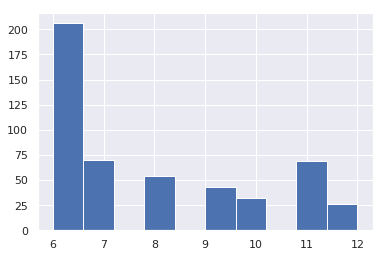

In [44]:
# histograma de edades en 2013
# d13.Edad.value_counts()
plt.hist(d13.Edad)

In [70]:
# Pregunta 2: ¿Cuál es la diferencia en el puntaje promedio en matemática de los 250 
# participantes (Participación=1) en 2012 y 2013?
participantes_2013_filter = d13['Participación']==1
participantes_2013 = d13[participantes_2013_filter]
promedio_puntaje_participantes_2013 = participantes_2013['Puntaje en matemáticas'].mean()
print('Promedio participantes 2013: {}'.format(promedio_puntaje_participantes_2013))

Promedio participantes 2013: 620.0201596


In [72]:
participantes_2012_filter = d12['id del estudiante'].isin(participantes_2013['id del estudiante'])
participantes_2012 = d12[participantes_2012_filter]
promedio_puntaje_participantes_2012 = participantes_2012['Puntaje en matemáticas'].mean()
print('Promedio en 2012 de los participantes 2013: {}'.format(promedio_puntaje_participantes_2012))

Promedio en 2012 de los participantes 2013: 590.0000016000001


In [76]:
# Pregunta 4, tabla 2
edad_promedio_2013_participantes = participantes_2013.Edad.mean()
edad_promedio_2012_participantes = participantes_2012.Edad.mean()
print('Edades promedio: 2012={}, 2013={}'.format(edad_promedio_2012_participantes, edad_promedio_2013_participantes))

Edades promedio: 2012=7.596, 2013=8.596


In [78]:
genero_promedio_2013_participantes = participantes_2013.Género.mean()
genero_promedio_2012_participantes = participantes_2012.Género.mean()
print('Genero promedio: 2012={}, 2013={}'.format(genero_promedio_2012_participantes, genero_promedio_2013_participantes))

Genero promedio: 2012=0.16, 2013=0.16


In [80]:
educmadre_promedio_2013_participantes = participantes_2013['Educación de la madre'].mean()
educmadre_promedio_2012_participantes = participantes_2012['Educación de la madre'].mean()
print('Educación de la madre promedio: 2012={}, 2013={}'.format(educmadre_promedio_2012_participantes, educmadre_promedio_2013_participantes))

Educación de la madre promedio: 2012=0.08, 2013=0.08


In [81]:
pobre_promedio_2013_participantes = participantes_2013['Hogar pobre'].mean()
pobre_promedio_2012_participantes = participantes_2012['Hogar pobre'].mean()
print('Pobreza promedio: 2012={}, 2013={}'.format(pobre_promedio_2012_participantes, pobre_promedio_2013_participantes))

Pobreza promedio: 2012=0.296, 2013=0.232
